# How to deal with Class Imbalance in Python

* https://vitalflux.com/class-imbalance-class-weight-python-sklearn/

In [14]:
import numpy as np
from collections import Counter

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [8]:
X, y = cancer.data, cancer.target

X.shape, y.shape, Counter(y)

((569, 30), (569,), Counter({0: 212, 1: 357}))

In [9]:
X_imb = np.vstack((X[y == 1], X[y == 0][:30]))
y_imb = np.hstack((y[y == 1], y[y == 0][:30]))

X_imb.shape, y_imb.shape, Counter(y_imb)

((387, 30), (387,), Counter({1: 357, 0: 30}))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=1, stratify=y_imb)

print(X_train.shape, Counter(y_train))
print(X_test.shape, Counter(y_test))

(270, 30) Counter({1: 249, 0: 21})
(117, 30) Counter({1: 108, 0: 9})


In [21]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(StandardScaler(), 
                         LogisticRegression(random_state=1, class_weight={0:3, 1:1}))
param_dist = [{'logisticregression__C': stats.expon(scale=100)}]

rs = RandomizedSearchCV(estimator=pipeline, param_distributions = param_dist, 
                        cv = 10, scoring = 'roc_auc', 
                        refit = True, n_jobs = 1,random_state=1)
rs.fit(X_train, y_train)

print('Train Score: %.4f' % rs.best_score_)
print('Best Params:', rs.best_params_)
print('Test Score: %.4f' % rs.score(X_test, y_test))

Train Score: 0.9932
Best Params: {'logisticregression__C': 15.87095951946739}
Test Score: 1.0000


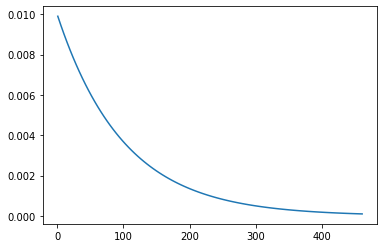

In [22]:
import matplotlib.pyplot as plt

expon = stats.expon(scale=100)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x))